# 문제정의 

서울지역(구)의 경도, 위도 정보를 이용하여 임의로 입력된 지역(동)을 강동, 강서,강남,강북으로 분류

# 1. 데이터 수집 
서울의 대표적인 구(district)위치 데이터

컬럼 주석 
- distrcit  : 행정구역(서초구, 송파구....)
- dong      : 구(district)보다 작은 행정구역 (대치동, 도곡동....) 
- longitude : 경도 
- latitude  : 위도
- label     : 한강기준으로 동,서,남,북으로 구분한 지역 

In [30]:
import pickle

In [31]:
# 데이터 불러오기 
path = './input/district_dict_list.pickle'
with open( path , 'rb') as f:
    df_train = pickle.load(f)
    
path = './input/dong_dict_list.pickle'
with open( path , 'rb') as f:
    df_test = pickle.load(f)

In [32]:
df_train.head(2)

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.55100,Gangseo
1,Yangcheon-gu,126.855396,37.52424,Gangseo


In [33]:
df_test.head(2)

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo


In [34]:
print('df_train>>>',df_train.columns,'\n','df_test>>',df_test.columns)

df_train>>> Index(['district', 'longitude', 'latitude', 'label'], dtype='object') 
 df_test>> Index(['dong', 'longitude', 'latitude', 'label'], dtype='object')


In [35]:
# 현재 보유한 레이블 개수 확인 
df_train.label.value_counts()

Gangbuk     5
Gangdong    5
Gangnam     5
Gangseo     5
Name: label, dtype: int64

In [36]:
df_test['label'].value_counts()

Gangbuk     5
Gangdong    5
Gangnam     5
Gangseo     5
Name: label, dtype: int64

현재 데이터로 강북, 강서, 강동, 강남이라는 4가지 분류값을 가지고  
위도, 경도 정보만으로 지역의 레이블을 예측 해볼수 있도록 전처리.

# 2. 데이터 전처리

In [37]:
df_train.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [38]:
df_test.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.995297,37.549652
std,0.095166,0.051614
min,126.815719,37.483279
25%,126.954698,37.501336
50%,127.014838,37.545835
75%,127.060807,37.580557
max,127.137382,37.648446


# 2-1. 데이터 시각화 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

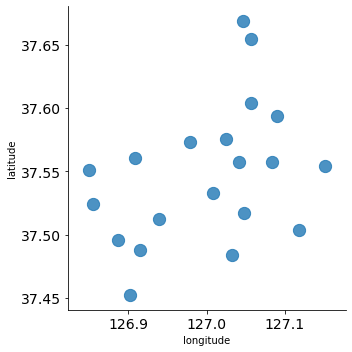

In [40]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train, fit_reg=False, scatter_kws={'s':150})

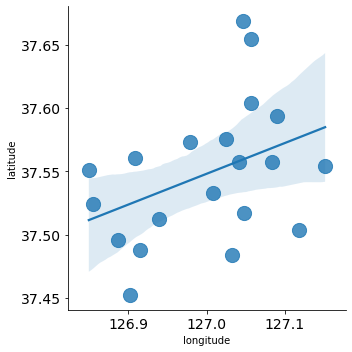

In [41]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train, scatter_kws={'s':200})

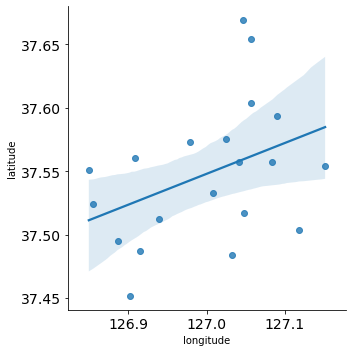

In [42]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train)

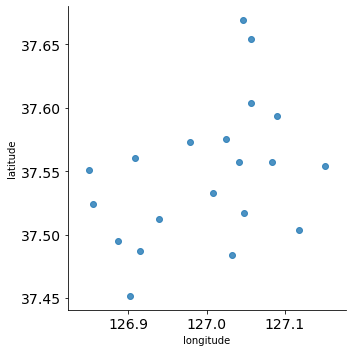

In [43]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train, fit_reg=False)

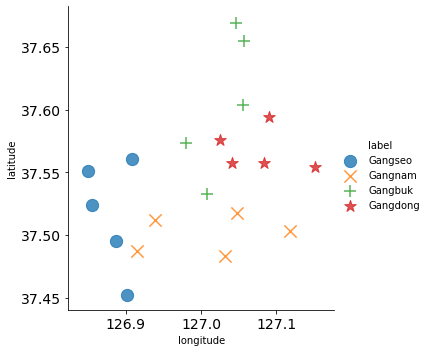

In [44]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train,
           fit_reg=False, scatter_kws={'s':150}, 
           markers=['o','x','+','*'], hue='label')

강서는 동그라미, 강북은 +, 강남은 x, 강동은 별표  
강서는 중심으로부터 서쪽에, 강동은 중심으로부터 동쪽에  
강북은 중심으로부터 북쪽에, 강남은 중심으로부터 남쪽에 위치한 패턴

# 3. 데이터 다듬기 

- 레이블이랑 위도 경도만 다듬으면 ok
    - 학습에 필요없는 특징데이터 제거 
    - 학습 데이터에서는 구 이름 컬럼 제거
    - 테스트 데이터에서는 동 이름 컬럼 제거 


In [45]:
df_train.drop(['district'], axis=1, inplace=True)
df_test.drop(['dong'], axis=1, inplace=True)

In [46]:
X_train = df_train[['longitude','latitude']]
y_train = df_train[['label']]

X_test = df_test[['longitude','latitude']]
y_test = df_test[['label']]

# 4. 시각화 

In [48]:
import pandas as pd
import numpy as np

# sklearn
from sklearn import tree
from sklearn import preprocessing

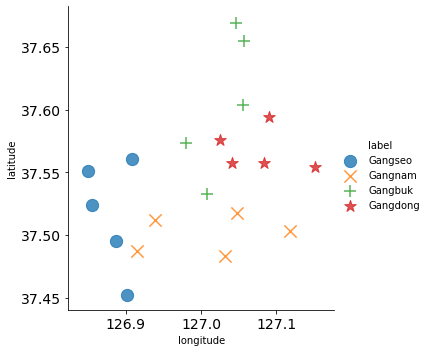

In [47]:
# 경도 위도에 따른 데이터 시각화 
sns.lmplot('longitude', 'latitude', data=df_train,
           fit_reg=False, scatter_kws={'s':150}, 
           markers=['o','x','+','*'], hue='label')

In [49]:
# 함수 생성 
def display_desision_surface():
    pass

## 4-1. 결정 표면 시각화 

In [50]:
# 함수 생성 
def display_desision_surface(clf, X, y):
    # 차트의 범위와 모든 학습데이터를 포함하도록 설정 
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min()  - 0.01
    y_max = X.latitude.max()  + 0.01
    
    # 파라미터 설정 
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step = 0.001
    
    # plt.contourf 차트를 그리기 위해 X, Y 이차원 영역 설정
    xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    
    z  = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z  = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap = plt.cm.RdYlBu)
    
    # 학습 데이터를 차트에 표시 
    for i , color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter( X.loc[idx].longitude,
                      X.loc[idx].latitude,
                      c= color,
                      label = le.classes_[i],
                      cmap=plt.cm.RdYlBu,
                      edgecolors='black', s = 200)
        
    #차트 제목
    plt.title("Decision surface of a decision tree", fontsize=16)
    #차트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude', fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude', fontsize=16)
    #차트 크기 설정
    plt.rcParams['figure.figsize'] = [7, 5]
    #차트 폰트 크기 설정
    plt.rcParams['font.size'] = 14
    #x축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize'] = 14
    #y축 좌표상의 폰트 크기 설정
    plt.rcParams['ytick.labelsize'] = 14

    plt.show()

### 4-1-1. 파라미터 없이 학습한 모델의 결정 표면 시각화 

의사결정 트리는 오버피팅되기 상당히 쉬운 모델, 
별도의 파라미터를 설정하지 않을 경우 최대한 학습데이터에만 잘 맞게 모델이 형성(오버피팅)
시각화 결과를 모면 강남, 강북, 강동, 강서 지역 부분이라기 보다는  
단순한 학습 데이터 구분에만 집중된 모델임을 볼 수 있다. 

In [51]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


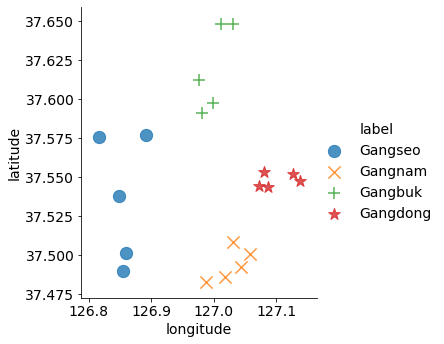

In [60]:
# 데이터 분포 확인 파일
sns.lmplot('longitude', 'latitude', data=df_test,
           fit_reg=False, scatter_kws={'s':150}, 
           markers=['o','x','+','*'], hue='label')

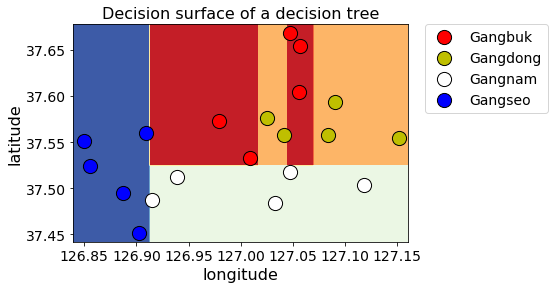

In [53]:
display_desision_surface(clf, X_train, y_encoded )

### 4-1-2. 파라미터 설정한 모델의 결정 표면 시각화 

- max_depth : 트리의 최대 한도 깊이  
- min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
- mins_samples_leaf : 맨 마직막 끝 노드의 최소 데이터 갯수  
- random_state : 여러번 실행해도, 파라미터가 같을 경우 결과가 항상 같게 유지 

오버피팅을 피하기 위해 파라미터를 설정한 의사결정트리의 의사 결정 표면 차트     
오버피팅된 이전 모델보다 강동, 강서, 강남 강북을 더적절하게 분류 한 것을 확인할 수 있다.

In [61]:
clf = tree.DecisionTreeClassifier(max_depth=4,
                                  min_samples_split= 2,
                                  min_samples_leaf=2,
                                  random_state=70).fit(X_train, y_encoded.ravel())

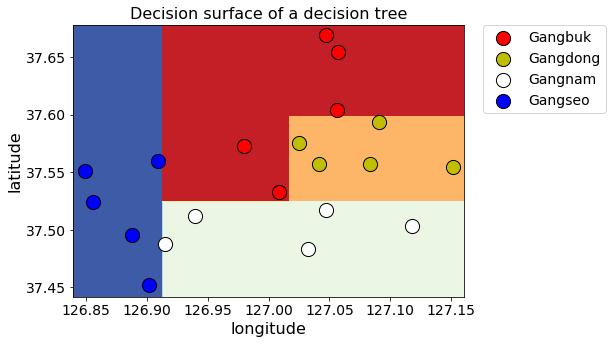

In [55]:
display_desision_surface(clf, X_train, y_encoded )

## 4-2. 의사결정 트리 시각화 


```
! pip install graphviz # 인스톨 
```

- 파일 다운로드 : <https://graphviz.gitlab.io/_pages/Download/Download_windows.html>
    - path : C:\Program Files (x86)\graphviz-2.38
    - 환경 설정 path => C:\Program Files (x86)\graphviz-2.38\release\bin

In [62]:
# 의사결정나무 시각화 툴 
import graphviz

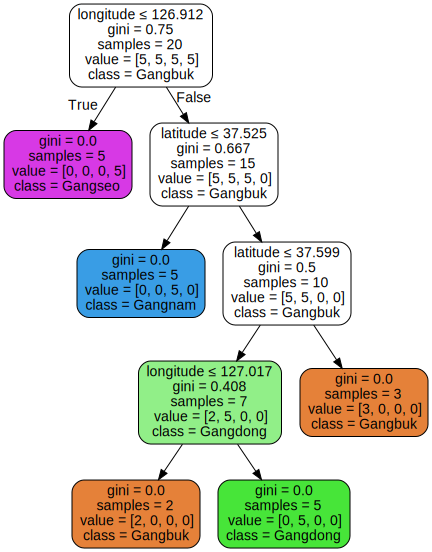

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['longitude', 'latitude'],
                               class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

- gini : 불순도 척도
    0일 경우 모든 샘플이 하나의 분류값을 갖는다
    0이 아닐 경우 1에 가까울 수록 여러 분류값이 한 노드에 존재
- samples : 노드 안에 들어있는 데이터의 갯수
- value : 분류값 별 데이터의 갯수
- class : 분류값

# 5. 테스트

In [64]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [65]:
print("accuracy : "+str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [66]:
# 실제값과 예측값 비교
comparison = pd.DataFrame({'prediction':le.classes_[pred], 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [67]:
pred

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [68]:
le.classes_[pred]

array(['Gangseo', 'Gangseo', 'Gangseo', 'Gangseo', 'Gangseo', 'Gangnam',
       'Gangnam', 'Gangnam', 'Gangnam', 'Gangnam', 'Gangbuk', 'Gangbuk',
       'Gangbuk', 'Gangbuk', 'Gangbuk', 'Gangdong', 'Gangdong',
       'Gangdong', 'Gangdong', 'Gangdong'], dtype=object)

In [63]:
help(le.classes_)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec